<a href="https://colab.research.google.com/github/keerthana2189/CODSOFT/blob/main/CodSoft_TASK1_MOVIERATINGPREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**CODSOFT**

**Name: Keerthana N D**


**Batch: Sept Batch A6**


**Role: Data Science**


###**TASK 1 : MOVIE RATING PREDICTION WITH PYTHON**

###*Importing Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


###*Loading Data*

In [2]:
#read csv file
movie = pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1') #encoding issues that may exist in the file
#print
movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#describes the statistical measure of each numeric column
movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [4]:
#summary of the df
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
#datatypes of columns
movie.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [6]:
#missing null values
movie.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
#determine the dimension of df
movie.shape

(15509, 10)

In [8]:
#to count the unique values in a particular column
movie['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [9]:
movie['Director'].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [10]:
movie['Actor 1'].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

In [11]:
movie['Actor 2'].value_counts()

Rekha                 83
Hema Malini           72
Mithun Chakraborty    63
Dharmendra            61
Mala Sinha            48
                      ..
Paris Keswani          1
Shubhangi Latkar       1
Amit Ghosh             1
Ayushi Singh           1
Sarah Jane Dias        1
Name: Actor 2, Length: 4891, dtype: int64

In [12]:
movie['Actor 3'].value_counts()

Pran             91
Shakti Kapoor    65
Anupam Kher      64
Jeevan           59
Prem Chopra      52
                 ..
Kayamali          1
Kirit Shah        1
Sanil Khosla      1
Anup Grover       1
Suparna Anand     1
Name: Actor 3, Length: 4820, dtype: int64

###*Data Preprocessing*

In [13]:
#removes the missing value
movie.dropna(subset=['Name','Year','Duration','Votes','Rating'],inplace=True)
#missing value left in each column
movie.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [14]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [15]:
# Convert the 'Year' column to strings and remove non-numeric characters
movie['Year'] = movie['Year'].astype(str).str.extract('(\d+)')

# Convert the cleaned 'Year' column to numeric, converting non-numeric values to NaN
movie['Year'] = pd.to_numeric(movie['Year'], errors='coerce')

# Drop rows with missing 'Year' values
movie.dropna(subset=['Year'], inplace=True)

In [16]:
#print 10 rows of the year
movie['Year'].head(10)

1     2019
3     2019
5     1997
6     2005
8     2012
9     2014
10    2004
11    2016
12    1991
13    2012
Name: Year, dtype: int64

In [17]:
# Extract numeric part of the string
movie['Duration'] = movie['Duration'].str.extract('(\d+)')
# Convert to integer with handling of missing values
movie['Duration'] = movie['Duration'].astype(float).astype(pd.Int64Dtype())


In [18]:
#print 10 rows of the Duration
movie['Duration'].head(10)

1     109
3     110
5     147
6     142
8      82
9     116
10     96
11    120
12    161
13    166
Name: Duration, dtype: Int64

In [19]:
# Extract numeric part of the string
movie['Votes'] = movie['Votes'].str.extract('(\d+)')
# Convert to integer with handling of missing values
movie['Votes'] = movie['Votes'].astype(float).astype(pd.Int64Dtype())


In [20]:
#print 10 rows of the Votes
movie['Votes'].head(10)

1       8
3      35
5     827
6       1
8     326
9      11
10     17
11     59
12    983
13    512
Name: Votes, dtype: Int64

In [21]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int64  
 2   Duration  5851 non-null   Int64  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   Int64  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: Int64(2), float64(1), int64(1), object(6)
memory usage: 514.2+ KB


In [22]:
movie.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.0,5851.000000,5851.0
mean,1996.416852,132.29448,5.931875,125.840882
std,19.914640,26.555826,1.389942,203.50013
min,1931.000000,21.0,1.100000,1.0
25%,1983.000000,117.0,5.000000,10.0
50%,2002.000000,134.0,6.100000,33.0
75%,2013.000000,150.0,7.000000,136.0
max,2021.000000,321.0,10.000000,999.0


In [23]:
#extracting 10 entries
genre=movie['Genre']
genre.head(10)

1                         Drama
3               Comedy, Romance
5        Comedy, Drama, Musical
6           Drama, Romance, War
8     Horror, Mystery, Thriller
9       Action, Crime, Thriller
10                        Drama
11                       Horror
12    Horror, Romance, Thriller
13       Comedy, Drama, Romance
Name: Genre, dtype: object

In [24]:
#split the values
genre1=movie['Genre'].str.split(',',expand= True)
genre1.head(10)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
9,Action,Crime,Thriller
10,Drama,None,None
11,Horror,None,None
12,Horror,Romance,Thriller
13,Comedy,Drama,Romance


In [25]:
#print
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [26]:
movie['Actor'] = movie['Actor 1'] + ', ' + movie['Actor 2'] + ', ' + movie['Actor 3']
movie['Actors'] = movie['Actor'].astype('category').cat.codes
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",3897
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",3363
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1126
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2099
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",5589


In [27]:
actors = pd.concat([movie['Actor 1'], movie['Actor 2'], movie['Actor 3']]).dropna().value_counts()
actors.head(5)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           125
Akshay Kumar          120
dtype: int64

In [28]:
movie['Genres'] = movie['Genre'].astype('category').cat.codes
Genres = movie['Genres']
Genres.head(7)

1     246
3     187
5     160
6     306
8     337
9      37
10    246
Name: Genres, dtype: int16

In [29]:
movie['Directors'] = movie['Director'].astype('category').cat.codes
Directors = movie['Directors']  # Use the correct column name 'Directors'
Directors.head(7)


1      660
3     1406
5     1605
6     2143
8      144
9      421
10    1134
Name: Directors, dtype: int16

###*Exploratory Data Analysis/Data Visualization*

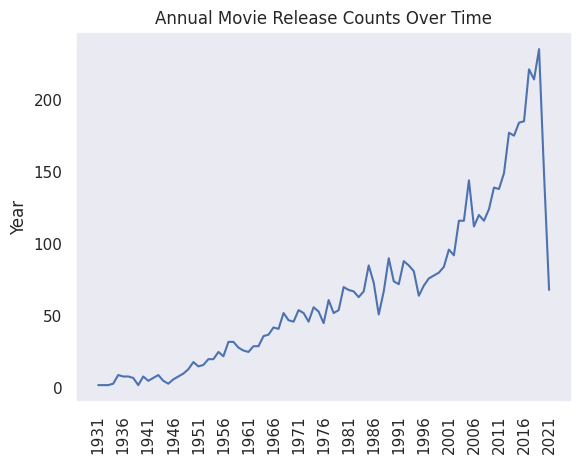

In [30]:
#Set the style and font for the plot
sns.set(style='dark', font='Sans-Serif')

# Create a line plot for movie release counts over time
mac = sns.lineplot(data=movie['Year'].value_counts().sort_index())
# Define the tick positions
tick_positions = range(min(movie['Year']), max(movie['Year']) + 1, 5)
# Set the plot title and adjust the x-axis ticks
mac.set_title('Annual Movie Release Counts Over Time')
mac.set_xticks(tick_positions)
mac.set_xticklabels(tick_positions, rotation=90)

plt.show()

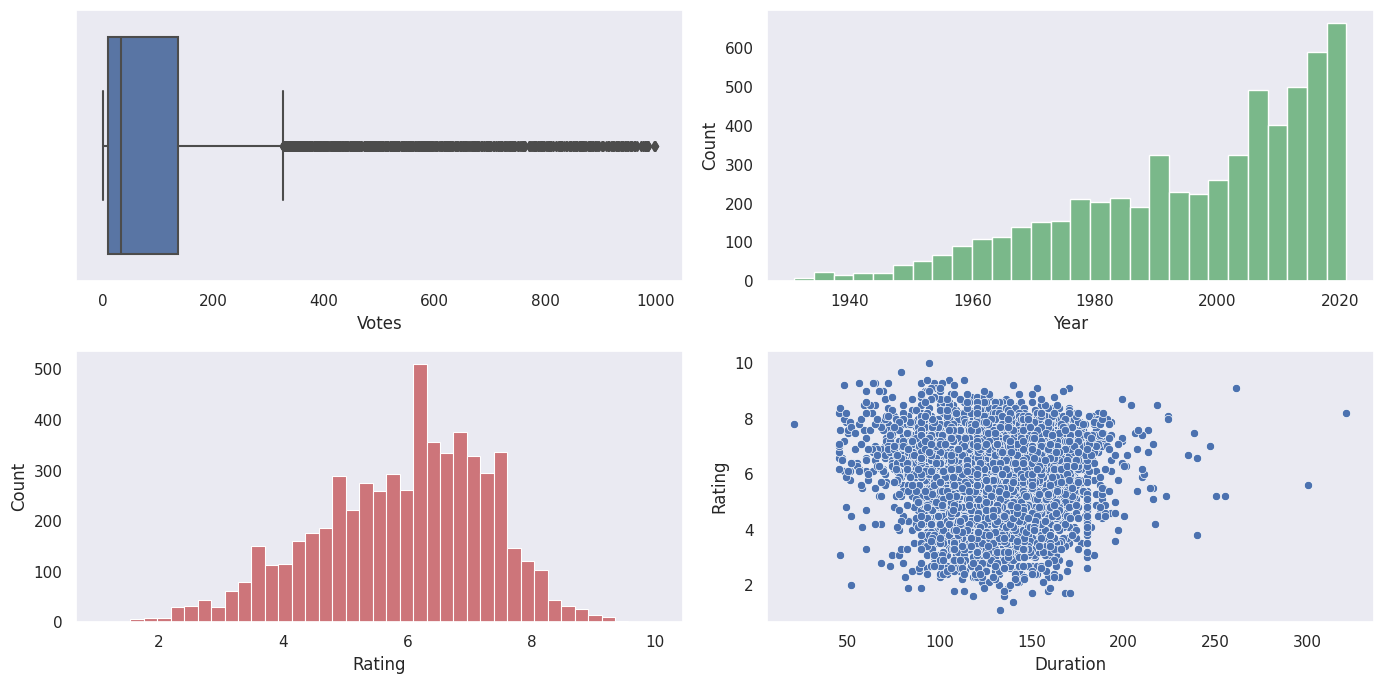

In [31]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Votes',data=movie)

plt.subplot(2,2,2)
sns.histplot(movie['Year'],color='g')

plt.subplot(2,2,3)
sns.histplot(movie['Rating'],color='r')

plt.subplot(2,2,4)
sns.scatterplot(x=movie['Duration'], y=movie['Rating'], data=movie)

plt.tight_layout()
plt.show()

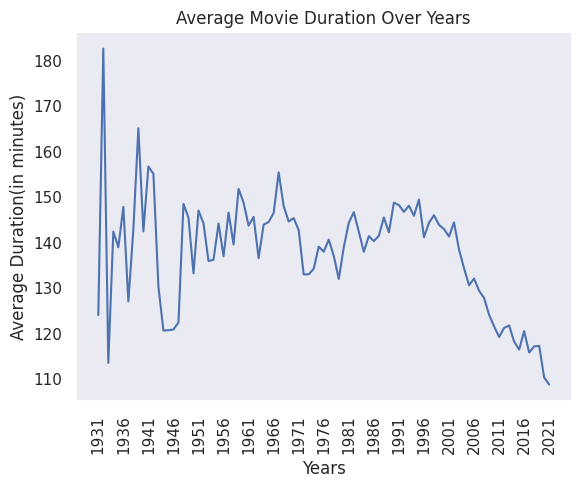

In [32]:
mac = sns.lineplot(data=movie.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
tick_positions = range(min(movie['Year']), max(movie['Year']) + 1, 5)
mac.set_title('Average Movie Duration Over Years')
mac.set_xticks(tick_positions)
mac.set_xticklabels(tick_positions, rotation = 90)
mac.set_xlabel('Years')
mac.set_ylabel('Average Duration(in minutes)')
plt.show()

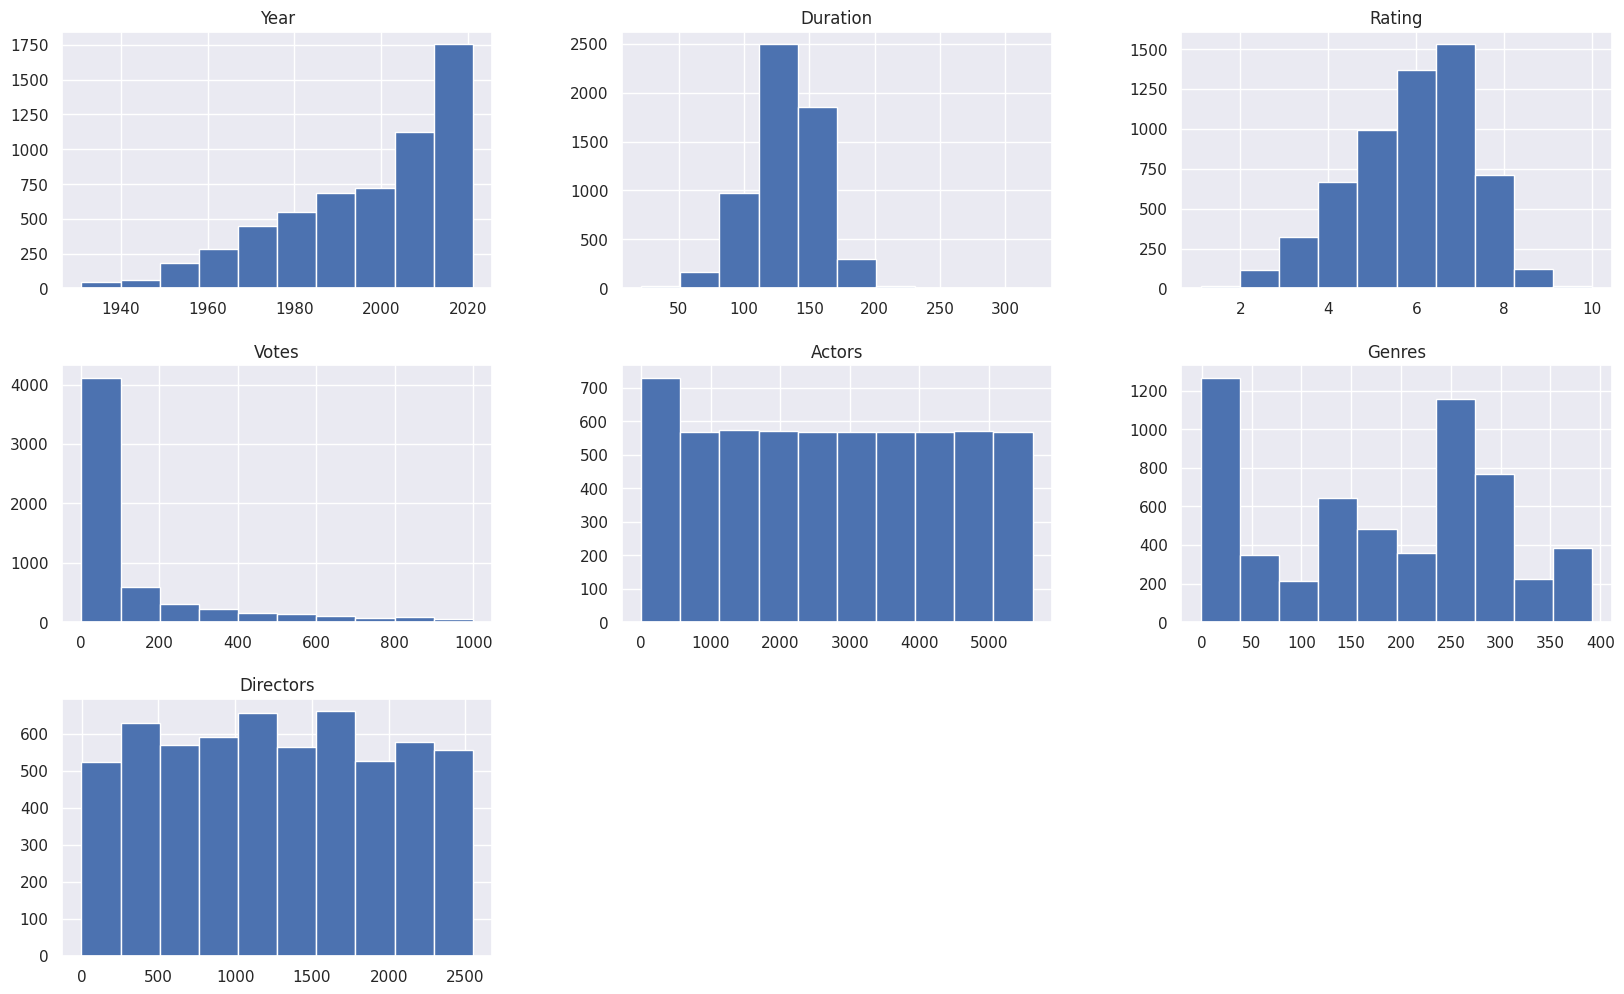

In [33]:
movie.hist(figsize=(20, 12))
None #directly displays the histograms in the output cell

<ipython-input-34-db210c732f78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = movie.corr()


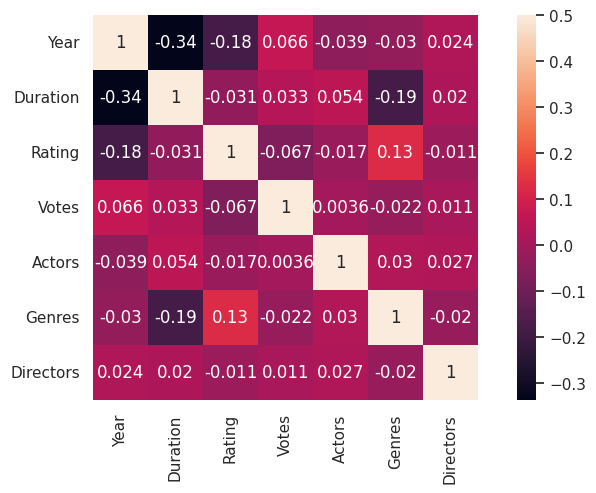

In [34]:
#Heatmap
corrmat = movie.corr()
fig = plt.figure(figsize = (10, 5))

sns.heatmap(corrmat, vmax = .5, square = True, annot = True)
plt.show()

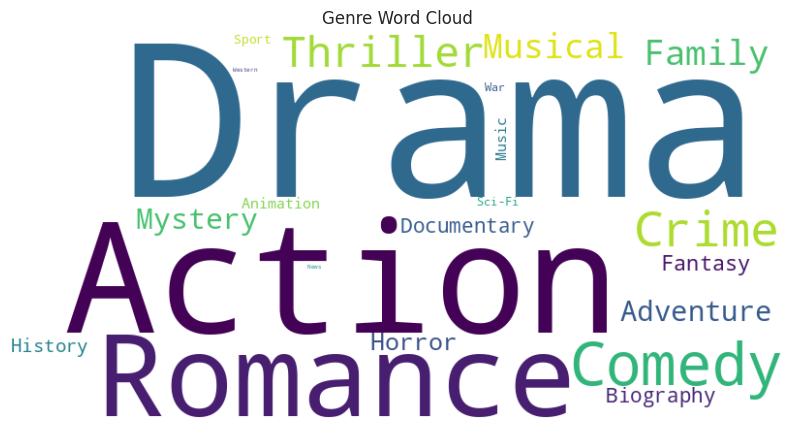

In [35]:
genre_counts = movie['Genre'].str.split(', ', expand=True).stack().value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()


In [36]:
genres=movie['Genre'].str.split(',',expand=True)
genres.head(5)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [37]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Convert genre keys to strings before sorting
genreCounts = {str(genre): count for genre, count in genre_counts.items()}
sorted_genre_counts = dict(sorted(genreCounts.items()))

for genre, count in sorted_genre_counts.items():
    print(f"{genre}: {count}")


 Action: 38
 Adventure: 179
 Biography: 42
 Comedy: 357
 Crime: 606
 Drama: 1972
 Family: 371
 Fantasy: 117
 History: 94
 Horror: 76
 Music: 52
 Musical: 326
 Mystery: 247
 News: 2
 Romance: 1223
 Sci-Fi: 30
 Sport: 42
 Thriller: 592
 War: 31
 Western: 2
Action: 1661
Adventure: 105
Animation: 56
Biography: 84
Comedy: 995
Crime: 272
Documentary: 130
Drama: 1875
Family: 57
Fantasy: 31
History: 9
Horror: 129
Music: 3
Musical: 90
Mystery: 61
Romance: 160
Sci-Fi: 5
Sport: 2
Thriller: 92
War: 3
nan: 93


In [38]:
genresPie = movie['Genre'].value_counts()
genresPie.head(5)

Drama                   870
Drama, Romance          334
Action, Crime, Drama    329
Action, Drama           207
Comedy, Drama           206
Name: Genre, dtype: int64

In [39]:
genrePie = pd.DataFrame(list(genresPie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})
genrePie.head(7)

,Genre,Count
0,Drama,870
1,"Drama, Romance",334
2,"Action, Crime, Drama",329
3,"Action, Drama",207
4,"Comedy, Drama",206
5,Comedy,191
6,"Comedy, Drama, Romance",188


In [40]:
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
mac= px.pie(genrePie, values='Count', names='Genre', title='Diverse range of movie genres in Indian Cinema')
mac.show()

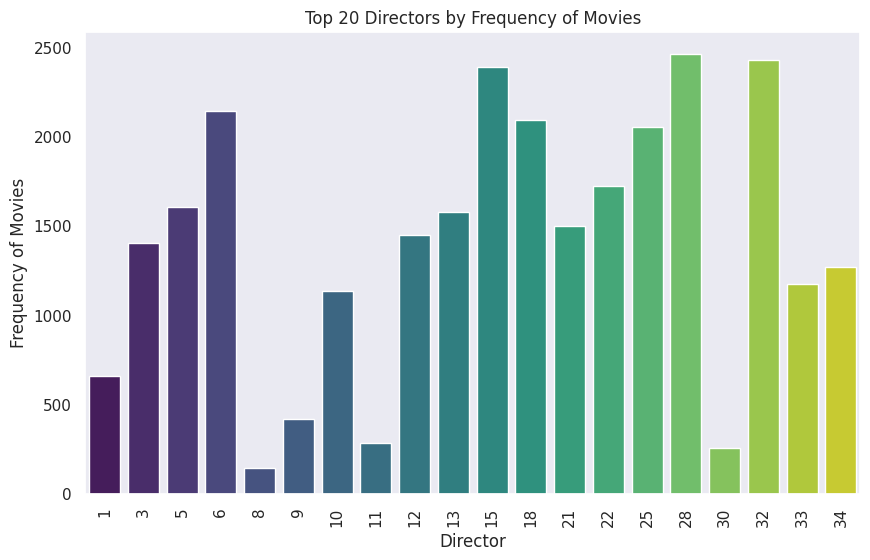

In [41]:

plt.figure(figsize=(10, 6))
mac = sns.barplot(x=Directors.head(20).index, y=Directors.head(20).values, palette='viridis')
mac.set_xlabel('Director')
mac.set_ylabel('Frequency of Movies')
mac.set_title('Top 20 Directors by Frequency of Movies')
mac.set_xticks(range(len(Directors.head(20).index)))  # Set explicit tick positions
mac.set_xticklabels(Directors.head(20).index, rotation=90)  # Set custom tick labels
plt.show()

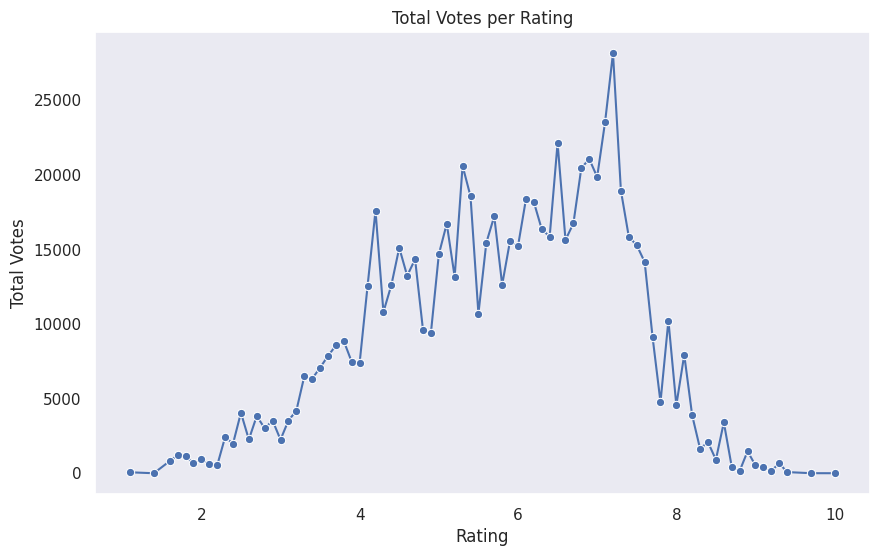

In [42]:
rating_votes = movie.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
mac_line_seaborn = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
mac_line_seaborn.set_xlabel('Rating')
mac_line_seaborn.set_ylabel('Total Votes')
mac_line_seaborn.set_title('Total Votes per Rating')
plt.show()

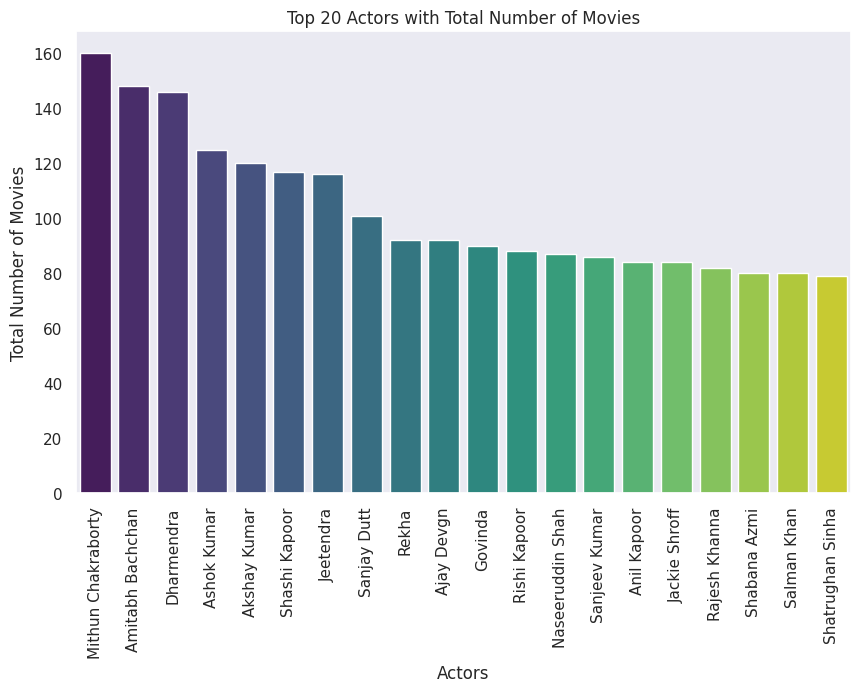

In [43]:
plt.figure(figsize=(10, 6))
mac = sns.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
mac.set_xlabel('Actors')
mac.set_ylabel('Total Number of Movies')
mac.set_title('Top 20 Actors with Total Number of Movies')
mac.set_xticklabels(mac.get_xticklabels(), rotation=90)
plt.show()

In [44]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Actors,Genres,Directors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",3897,246,660
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",3363,187,1406
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1126,160,1605
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2099,306,2143
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",5589,337,144


###*Featured Engineering*

In [45]:
movie.drop(['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)


,Year,Duration,Rating,Votes,Actors,Genres,Directors
1,2019,109,7.0,8,3897,246,660
3,2019,110,4.4,35,3363,187,1406
5,1997,147,4.7,827,1126,160,1605
6,2005,142,7.4,1,2099,306,2143
8,2012,82,5.6,326,5589,337,144
...,...,...,...,...,...,...,...
15493,2015,115,6.1,408,5385,246,1285
15494,2001,153,6.2,1,2301,136,2158
15503,1989,125,5.8,44,1177,28,1882
15505,1999,129,4.5,655,365,38,1074


In [46]:
X = movie[['Year','Duration','Votes']]
Y = movie['Rating']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

###*Model Building*

In [48]:
# Create a pipeline with standard scaling and SGD regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(max_iter=10000, random_state=1000))
])

In [49]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

In [50]:
# Predict ratings on the test set
y_pred_pipeline = pipeline.predict(X_test)

###*Model Evaluation*

In [51]:
# Calculate MAE, MSE, and R2 scores
mae_custom = mean_absolute_error(y_test, y_pred_pipeline)
mse_custom = mean_squared_error(y_test, y_pred_pipeline)
rmse_custom = mse_custom ** 0.5
r2_custom = r2_score(y_test, y_pred_pipeline)

# Now you have the scores with custom variable names
print(f"MAE: {mae_custom}")
print(f"MSE: {mse_custom}")
print(f'RMSE: {rmse_custom}')
print(f"R-squared: {r2_custom}")


MAE: 1.0937615791345985
MSE: 1.8775248893695355
RMSE: 1.370228042834307
R-squared: 0.04591900161619822


###*Model Deployment*

In [52]:
new_data = pd.DataFrame({
    'Year': [2023],
    'Duration': [120],
    'Votes': [1000],


})

# Use the trained pipeline to make predictions on new_data
predicted_rating = pipeline.predict(new_data)

print("Custom Message:", predicted_rating)


Custom Message: [5.3659386]


###*Conclusion*

**Objective**: Predict movie ratings based on features like genre, director, and actors using regression techniques.

**Data Exploration**: Analyze the dataset to understand its characteristics and identify any missing values.

**Data Preprocessing**: Prepare the data for modeling by handling missing values, encoding categorical features, and performing feature engineering.

**Feature Engineering**: Enhance the dataset by encoding categorical features and extracting relevant information from actor columns.

**Model Building**: Train a Linear Regression model to predict movie ratings.

**Model Evaluation**: Assess model performance using metrics like Mean Squared Error (MSE) and R-squared.

**Model Deployment**: Consider deploying the model for real-world applications, such as movie recommendation systems.

